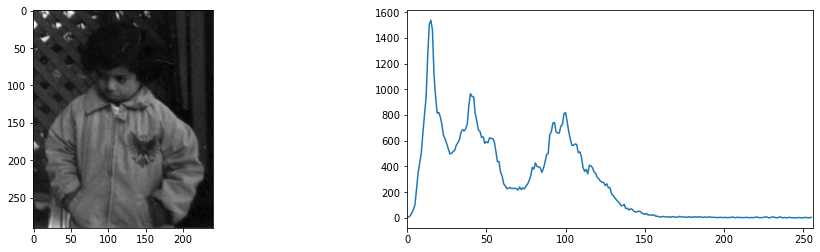

In [14]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("Images/sample_img_child.jpg")
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, img)
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.figure(figsize=[16,4])
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.plot(hist)
plt.xlim([0,256])
plt.show()

In [2]:
# Method 1 algorithm
# custom weighted percentile function to find c and d
# returns the index at which some percent of the sum of values of the array is below it
def weighted_percentile(arr, percentile):
    arr_percentile = np.sum(arr) * percentile / 100
    temp_sum = 0
    for i in range(np.size(arr)):
        temp_sum += arr[i]
        if temp_sum >= arr_percentile:
            return i
    return arr[-1]
c1 = weighted_percentile(hist, 5)
d1 = weighted_percentile(hist, 95)

In [5]:
# Method 2 algorithm
peak = np.amax(hist)
peak_index = hist.tolist().index(peak)
cutoff = .05 * peak
c2 = 0; d2 = 255

for i in range(peak_index):
    if hist[i] > cutoff:
        c2 = i
        break

for i in range(np.size(hist)-1, peak_index, -1):
    if hist[i] > cutoff:
        d2 = i
        break

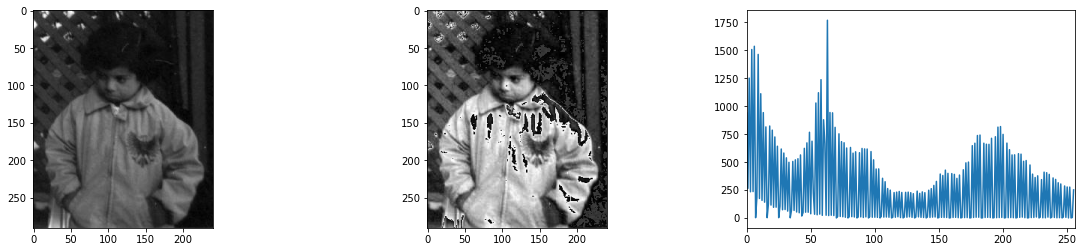

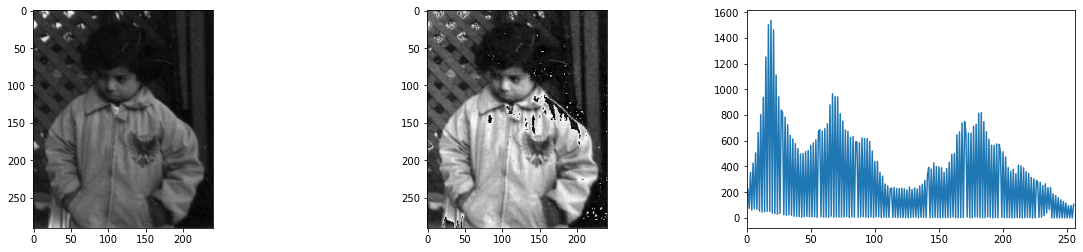

Method 1: 12, 125
Method 2: 5, 137


In [15]:
# assigns vals to a,b,c,d
# the descriptions for the vals were inconsistent in the textbook
#   and resulted in an all white picture
#   so I found different values that worked better at
#   https://academic.mu.edu/phys/matthysd/web226/Lab01.htm
a = 0
b = 255
scalar1 = (b-a)/(d1-c1)
scalar2 = (b-a)/(d2-c2)

# the algorithm
# new image needs to be converted back to uint8 because it was multiplied by a scalar
m1 = (img - c1) * scalar1 + a
m1 = m1.astype("uint8")
m2 = (img - c2) * scalar2 + a
m2 = m2.astype("uint8")

hist1 = cv2.calcHist([m1], [0], None, [256], [0,256])
hist2 = cv2.calcHist([m2], [0], None, [256], [0,256])

plt.figure(figsize=[20,4])
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(m1)
plt.subplot(133), plt.plot(hist1)
plt.xlim([0,256])
plt.show()

plt.figure(figsize=[20,4])
plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(m2)
plt.subplot(133), plt.plot(hist2)
plt.xlim([0,256])
plt.show()

print(f"Method 1: {c1}, {d1}")
print(f"Method 2: {c2}, {d2}")

# for some reason the output image has black patches
# may be result of opencv vs numpy addition